# Supplementary information: Plot the creep parameter distribution for the different glaciers and options 

In [1]:
import xarray as xr
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path_n = '/home/users/lschuster/oggm_mb_sandbox_option_intercomparison/oggm_run_gdir_folder/node_folder/'

In [3]:
file_path_l = []
for file_name in os.listdir(path_n):
    if 'run_output_gcm_run_' in file_name:  # Filter files by extension if needed
        file_path_l.append(os.path.join(path_n, file_name))

0.34690568 0.2877203
10.0
median var_an_cycle: 2.425654 constant: 2.750144
0.2877203 0.42176887
10.0
median linear: 2.8480015 neg_exp 2.6301558 false: 2.3629003
0.2880265 0.3380966
10.0
median daily: 2.7554932 monthly: 2.5483477
median pseudo_daily_fake: 2.526603
median $C_1$ 2.81
median $C_2$ 2.493468
median $C_3$ 2.6461825
median $C_4$ 2.3395522
median $C_5$ 2.6412723


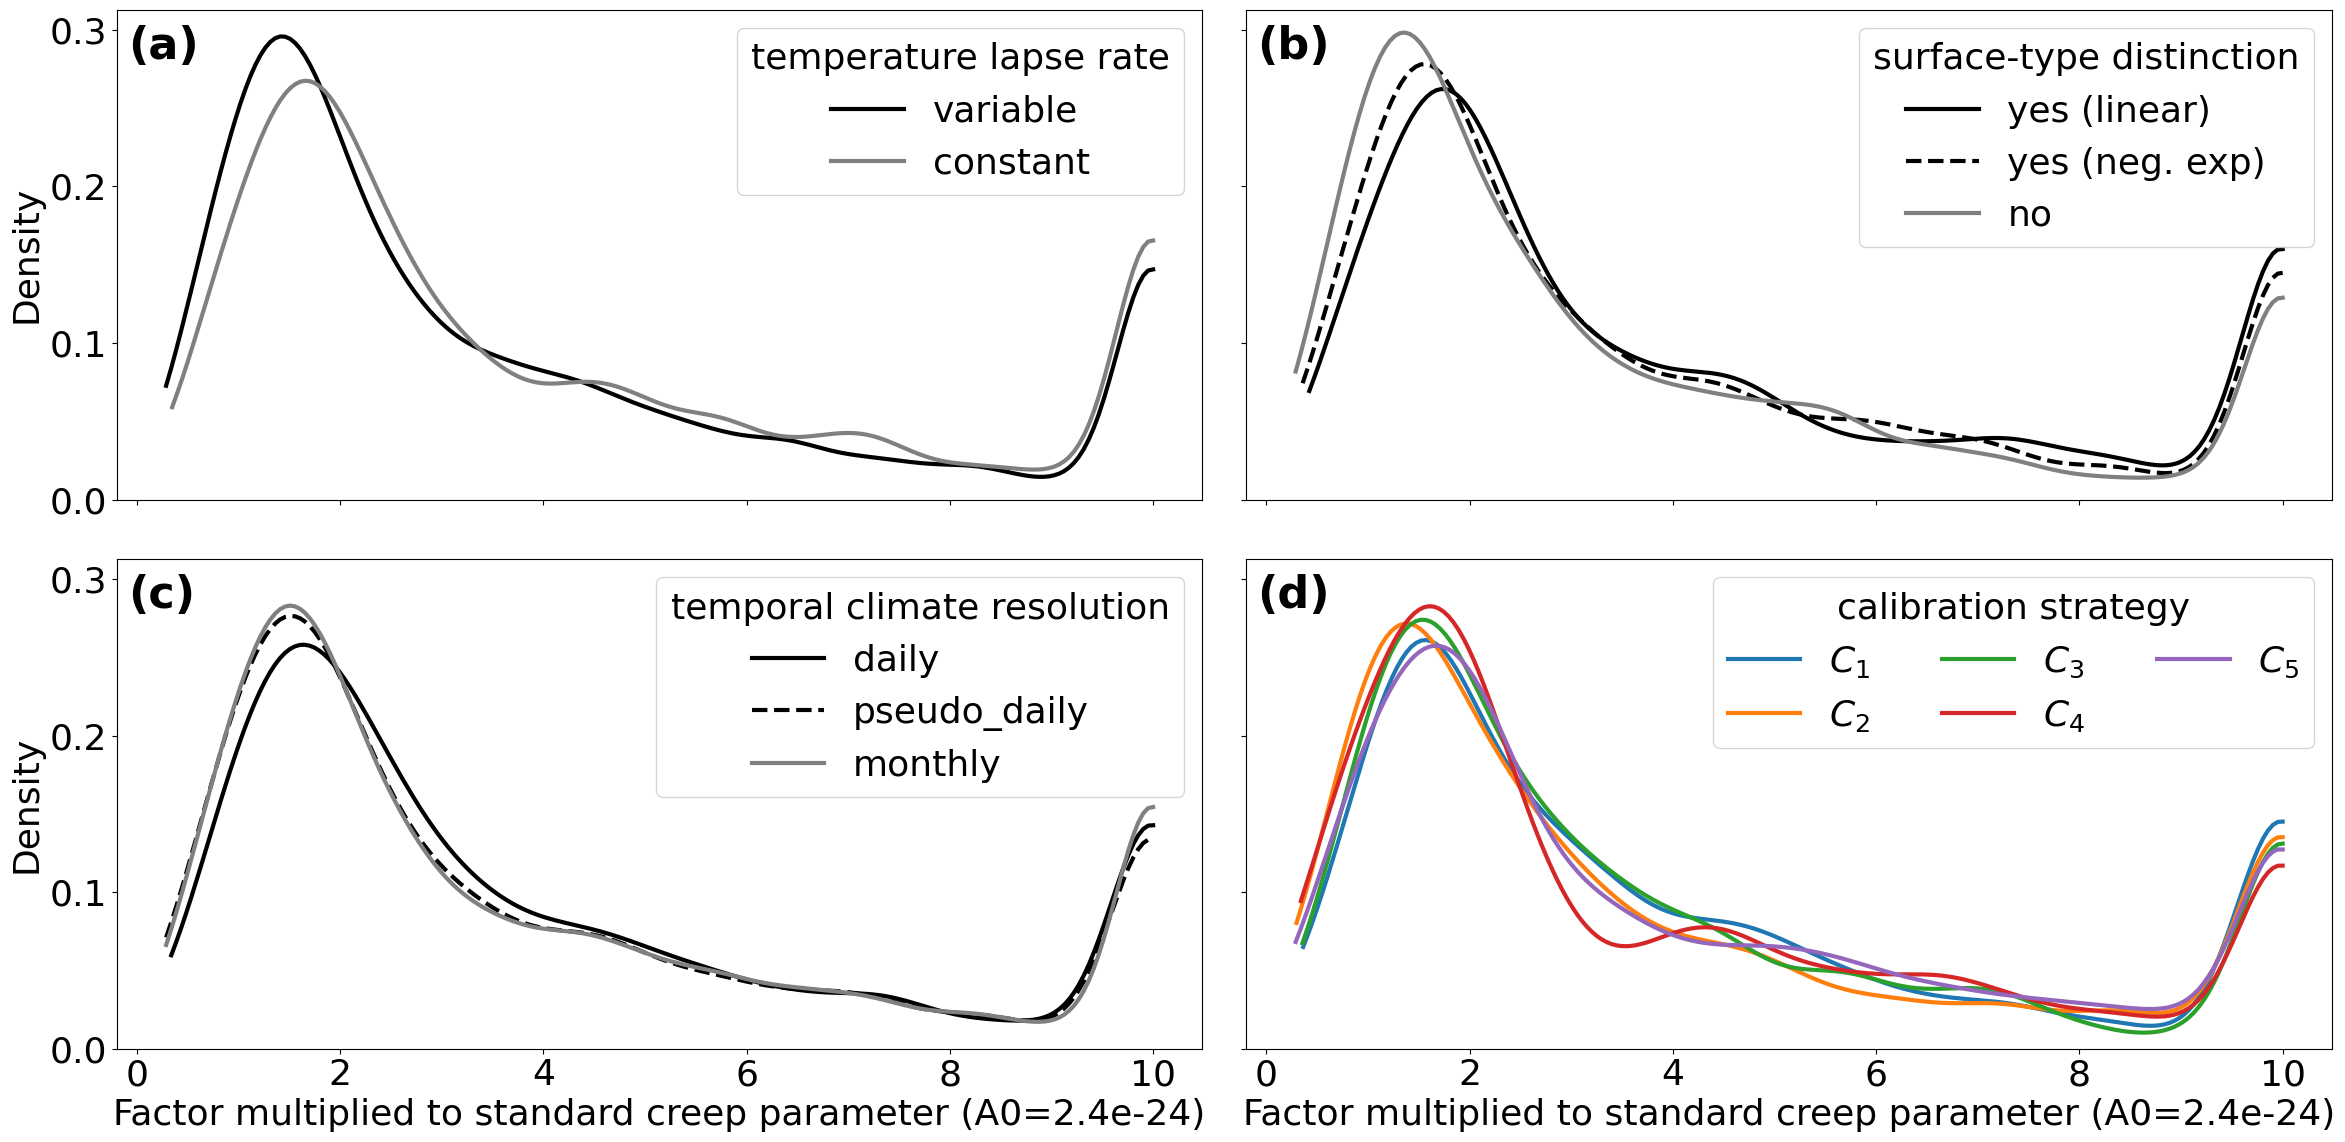

In [4]:
A_0 = 2.4e-24

plt.rc('font', size=26)
fig, axs = plt.subplots(2,2,figsize=(24,12), sharey=True, sharex=True)
# overall MB and calib option influence

num_dict = {0:'(a)', 1:'(b)', 2:'(c)', 3:'(d)', 4: '(e)', 5: '(f)', 6: '(g)'}

fs_num_dict = 32
num_text_x = 0.01
num_text_y = 0.9

#######
ax = axs[0][0]
ds_glen_a_var_an_cycle_l = []
ds_glen_a_cte_l = []
for f in file_path_l:
    if 'var_an_cycle' in f:
        with xr.open_dataset(f) as ds:
            ds_glen_a = ds.glen_a.load()/A_0
        ds_glen_a_var_an_cycle_l.append(ds_glen_a.values)
        #sns.kdeplot(ds_glen_a, cut =0, color = 'black')
    elif 'cte' in f:
        with xr.open_dataset(f) as ds:
            ds_glen_a = ds.glen_a.load()/A_0
        ds_glen_a_cte_l.append(ds_glen_a.values)
        #sns.kdeplot(ds_glen_a, cut =0, color = 'grey')
        
ds_glen_a_var_an_cycle = np.concatenate(ds_glen_a_var_an_cycle_l)
ds_glen_a_cte = np.concatenate(ds_glen_a_cte_l)
print(np.nanmin(ds_glen_a_cte), np.nanmin(ds_glen_a_var_an_cycle))
print(np.nanmax(ds_glen_a_cte))
print('median', 'var_an_cycle:', np.nanmedian(ds_glen_a_var_an_cycle), 'constant:', np.nanmedian(ds_glen_a_cte))
sns.kdeplot(ds_glen_a_var_an_cycle, ax=ax, lw=3,cut =0, color = 'black', label='variable')
sns.kdeplot(ds_glen_a_cte, ax=ax, cut =0, lw=3,color = 'grey', label='constant')
ax.legend(title='temperature lapse rate')
ax.set_xlabel('Factor multiplied to standard creep parameter (A0=2.4e-24)')

######
ax = axs[0][1]
ds_glen_a_linear_l = []
ds_glen_a_neg_exp_l = []
ds_glen_a_false_l = []
for f in file_path_l:
    if 'linear' in f:
        with xr.open_dataset(f) as ds:
            ds_glen_a = ds.glen_a.load()/A_0
        ds_glen_a_linear_l.append(ds_glen_a.values)
        #sns.kdeplot(ds_glen_a, cut =0, color = 'black')
    elif 'neg_exp' in f:
        with xr.open_dataset(f) as ds:
            ds_glen_a = ds.glen_a.load()/A_0
        ds_glen_a_neg_exp_l.append(ds_glen_a.values)
    elif 'False' in f:
        with xr.open_dataset(f) as ds:
            ds_glen_a = ds.glen_a.load()/A_0
        ds_glen_a_false_l.append(ds_glen_a.values)
        #sns.kdeplot(ds_glen_a, cut =0, color = 'grey')
        
ds_glen_a_linear = np.concatenate(ds_glen_a_linear_l)
ds_glen_a_neg_exp = np.concatenate(ds_glen_a_neg_exp_l)
ds_glen_a_false = np.concatenate(ds_glen_a_false_l)
print(np.nanmin(ds_glen_a_false), np.nanmin(ds_glen_a_linear))
print(np.nanmax(ds_glen_a_false))
print('median', 'linear:', np.nanmedian(ds_glen_a_linear),
      'neg_exp', np.nanmedian(ds_glen_a_neg_exp),
      'false:', np.nanmedian(ds_glen_a_false))

sns.kdeplot(ds_glen_a_linear, ax=ax, cut =0, lw=3,color = 'black', label='yes (linear)')
sns.kdeplot(ds_glen_a_neg_exp, ax=ax,cut =0, lw=3,ls = '--', color = 'black', label='yes (neg. exp)')
sns.kdeplot(ds_glen_a_false, ax=ax, cut =0, lw=3,color = 'grey', label='no')
ax.legend(title='surface-type distinction')
ax.set_xlabel('Factor multiplied to standard creep parameter (A0=2.4e-24)')

#########
ax = axs[1][0]

ds_glen_a_daily_l = []
ds_glen_a_pseudo_daily_l = []
ds_glen_a_monthly_l = []
for f in file_path_l:
    if 'real_daily' in f:
        with xr.open_dataset(f) as ds:
            ds_glen_a = ds.glen_a.load()/A_0
        ds_glen_a_daily_l.append(ds_glen_a.values)
        #sns.kdeplot(ds_glen_a, cut =0, color = 'black')
    elif 'pseudo_daily_fake' in f:
        with xr.open_dataset(f) as ds:
            ds_glen_a = ds.glen_a.load()/A_0
        ds_glen_a_pseudo_daily_l.append(ds_glen_a.values)
    elif 'monthly' in f:
        with xr.open_dataset(f) as ds:
            ds_glen_a = ds.glen_a.load()/A_0
        ds_glen_a_monthly_l.append(ds_glen_a.values)
        #sns.kdeplot(ds_glen_a, cut =0, color = 'grey')
        
ds_glen_a_daily = np.concatenate(ds_glen_a_daily_l)
ds_glen_a_pseudo_daily = np.concatenate(ds_glen_a_pseudo_daily_l)
ds_glen_a_monthly = np.concatenate(ds_glen_a_monthly_l)
print(np.nanmin(ds_glen_a_monthly), np.nanmin(ds_glen_a_daily))
print(np.nanmax(ds_glen_a_monthly))
print('median', 'daily:', np.nanmedian(ds_glen_a_daily), 'monthly:', np.nanmedian(ds_glen_a_monthly))
print('median', 'pseudo_daily_fake:', np.nanmedian(ds_glen_a_pseudo_daily))
sns.kdeplot(ds_glen_a_daily, ax=ax, lw=3,cut =0, color = 'black', label='daily')
sns.kdeplot(ds_glen_a_pseudo_daily, ax=ax, lw=3,cut =0, ls = '--', color = 'black', label='pseudo_daily')
sns.kdeplot(ds_glen_a_monthly, ax=ax,cut =0, lw=3,color = 'grey', label='monthly')
ax.legend(title='temporal climate resolution')
ax.set_xlabel('Factor multiplied to standard creep parameter (A0=2.4e-24)')
         
#### 
ax = axs[1][1]
calib_types_nice = [r'$C_1$',
                    r'$C_2$',
                    r'$C_3$',
                    r'$C_4$',
                    r'$C_5$']
ds_glen_a_calib_option_l = {}
ds_glen_a_calib_option = {}
for c,cn in zip(['calib_geod_opt_winter_mb_approx_std',
          'calib_geod_opt_winter_mb_temp_b_0', 'calib_geod_opt_std_temp_b_0',
          'calib_only_geod_temp_b_0_pf_cte_via_std',
          'calib_only_geod_temp_b_0_pf_fit_via_winter_mb'],
               calib_types_nice):
    ds_glen_a_calib_option_l[c] = []
    for f in file_path_l:
        if c in f:
            with xr.open_dataset(f) as ds:
                ds_glen_a = ds.glen_a.load()/A_0
            ds_glen_a_calib_option_l[c].append(ds_glen_a.values)
            
    ds_glen_a_calib_option[cn] = np.concatenate(ds_glen_a_calib_option_l[c])
    print('median', cn, np.nanmedian(ds_glen_a_calib_option[cn]))


for cn in calib_types_nice:
    sns.kdeplot(ds_glen_a_calib_option[cn], lw=3,ax=ax, cut =0, label=cn)
        
ax.legend(title = 'calibration strategy', ncol=3)
ax.set_xlabel('Factor multiplied to standard creep parameter (A0=2.4e-24)')

plt.tight_layout()
axs[0][0].text(num_text_x,num_text_y,'(a)',weight='bold',
                    fontsize=fs_num_dict, transform=axs[0][0].transAxes)
axs[0][1].text(num_text_x,num_text_y,'(b)',weight='bold',
                    fontsize=fs_num_dict, transform=axs[0][1].transAxes)
axs[1][0].text(num_text_x,num_text_y,'(c)',weight='bold',
                    fontsize=fs_num_dict, transform=axs[1][0].transAxes)
axs[1][1].text(num_text_x,num_text_y,'(d)',weight='bold',
                    fontsize=fs_num_dict, transform=axs[1][1].transAxes)
plt.savefig('../figures/figures_supplements/fig_XXX_glen_a_distribution.pdf')

In [114]:
# median over all experiments ... 
np.nanmedian(np.concatenate([ds_glen_a_cte, ds_glen_a_var_an_cycle]))

2.5986774

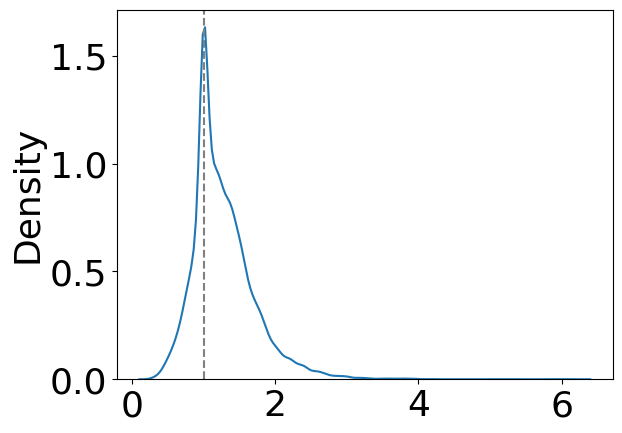

In [120]:
sns.kdeplot(ds_glen_a_linear/ds_glen_a_false)
plt.axvline(1, color = 'grey', ls='--')